## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import f_oneway

### Define the files to be loaded

In [2]:
# Participant number whose data should be loaded
participant_number = 1

# The version of the questionnaires to load
quest_version = 1

## Loading the data

In [3]:
df = pd.read_csv('data/preprocessed_data_' + str(participant_number) + '_v' + str(quest_version) + '.csv')

## Visualizations of the dataset

### Sleep scores visualizations

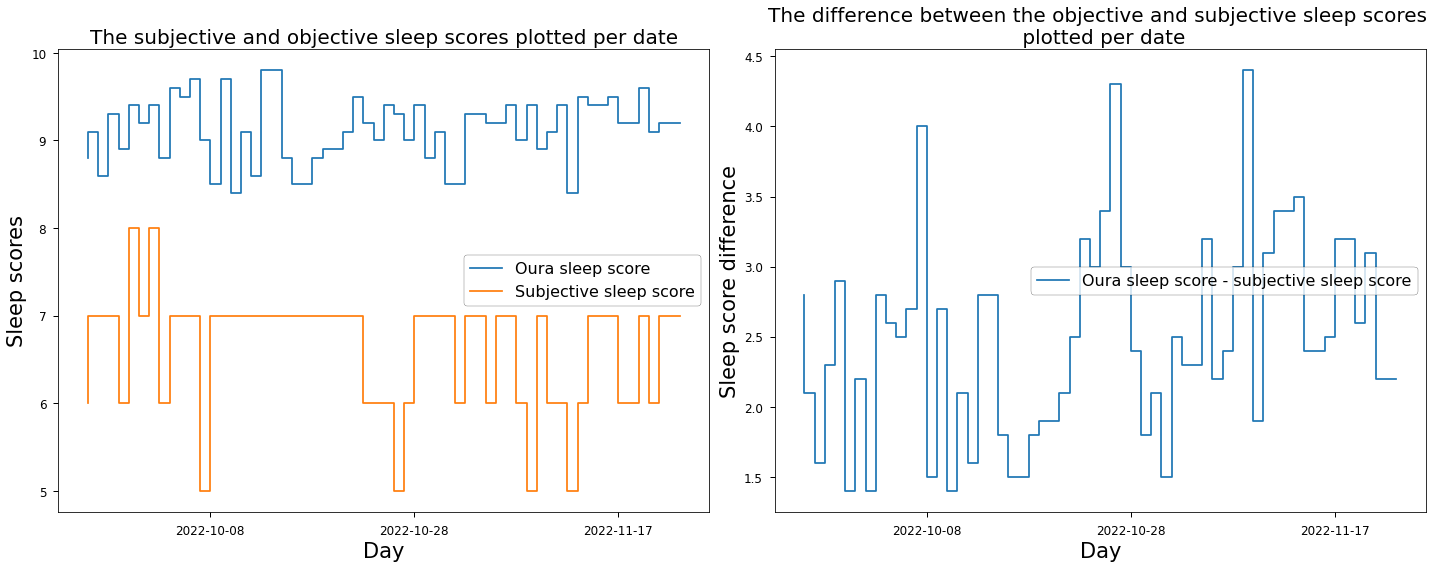

In [4]:
# Plot the subjective sleep scores (from the questionnaires) and the objective sleep scores (from the Oura ring measurements) together per date, 
# along with their difference in values
plt.style.use("seaborn-notebook")
colour_axes = "black"

# Prepare the list of days to be printed on the x-axis
days = list(map(datetime.datetime.strptime, df['actual_day'], len(df['actual_day'])*['%Y-%m-%d']))

sleep_scores = plt.figure(figsize=(20,8))
ax_sleep_scores = sleep_scores.add_subplot(121)
ax_sleep_scores.step(days, df['score'].values, label="Oura sleep score")
ax_sleep_scores.step(days, df['subjective_sleep_score'].values, label="Subjective sleep score")
ax_sleep_scores.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_sleep_scores.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax_sleep_scores.set_xlabel("Day", fontsize=21)
ax_sleep_scores.set_ylabel("Sleep scores", fontsize=21)
ax_sleep_scores.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_sleep_scores.set_title("The subjective and objective sleep scores plotted per date", fontsize=20)
ax_sleep_scores.yaxis.label.set_color(colour_axes)
ax_sleep_scores.xaxis.label.set_color(colour_axes)
ax_sleep_scores.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')

ax_scores_diff = sleep_scores.add_subplot(122)
ax_scores_diff.step(days, df['score'].values - df['subjective_sleep_score'].values, label="Oura sleep score - subjective sleep score")
ax_scores_diff.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_scores_diff.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax_scores_diff.set_xlabel("Day", fontsize=21)
ax_scores_diff.set_ylabel("Sleep score difference", fontsize=21)
ax_scores_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_scores_diff.set_title("The difference between the objective and subjective sleep scores \n plotted per date", fontsize=20)
ax_scores_diff.yaxis.label.set_color(colour_axes)
ax_scores_diff.xaxis.label.set_color(colour_axes)
ax_scores_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
sleep_scores.tight_layout()

plt.show()

In [5]:
# Compute the correlation of both sleep scores
scores_correlations = np.corrcoef(df['score'], df['subjective_sleep_score'])
print('Correlations of sleep scores')
print(scores_correlations)

Correlations of sleep scores
[[1.         0.15639939]
 [0.15639939 1.        ]]


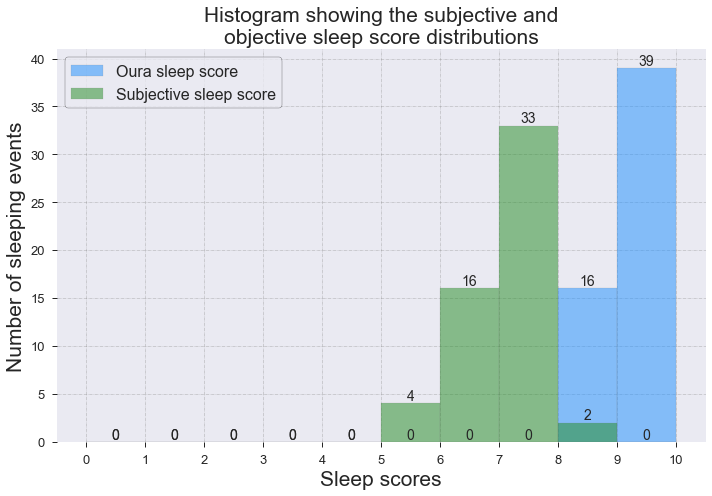

In [6]:
# Plot both the subjective and objective sleep scores in a histogram
n_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig = plt.figure(figsize =(10, 7))
plt.style.use("seaborn")
ax1 = fig.add_subplot(111)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax1.spines[s].set_visible(False)

ax1.tick_params(axis='both', which='major', size=5, labelsize=13)
ax1.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

# Creating the histogram
N, bins, patches = ax1.hist(df['score'].values, alpha=0.5, color = "dodgerblue", ec="gray", bins = n_bins, label = "Oura sleep score")
N1, bins1, patches1 = ax1.hist(df['subjective_sleep_score'].values, alpha=0.5, color = "forestgreen", ec="gray", bins = n_bins, label = "Subjective sleep score")

ax1.bar_label(patches, fontsize=14)
ax1.bar_label(patches1, fontsize=14)
ax1.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
ax1.set_xlabel("Sleep scores", fontsize=21)
ax1.set_ylabel("Number of sleeping events", fontsize=21)
ax1.set_title('Histogram showing the subjective and\nobjective sleep score distributions', fontsize=21)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

plt.tight_layout()

plt.show()

### Correlations in the Oura dataset

Text(0.5, 1.0, 'Heat map of the correlation of the Oura ring variables')

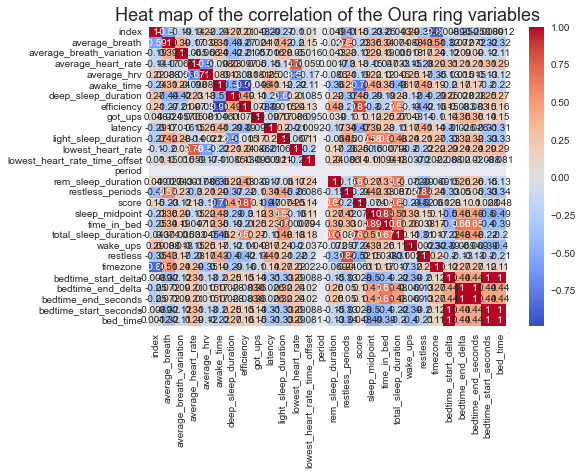

In [7]:
# Plot heatmap showing the correlation between the Oura ring variables
heatmap_data = df.iloc[:, 0:49]
heatmap_data = heatmap_data.drop(labels=['contributors.deep_sleep', 'contributors.efficiency', 'contributors.latency', 'contributors.rem_sleep', 'contributors.restfulness', 'contributors.timing', 'contributors.total_sleep', 'readiness.contributors.activity_balance', 'readiness.contributors.body_temperature', 'readiness.contributors.hrv_balance', 'readiness.contributors.previous_day_activity', 'readiness.contributors.previous_night', 'readiness.contributors.recovery_index', 'readiness.contributors.resting_heart_rate', 'readiness.contributors.sleep_balance', 'readiness.score', 'readiness.temperature_deviation', 'readiness.temperature_trend_deviation'], axis=1)
correlations = heatmap_data.corr()
heat_map = sns.heatmap(correlations, cmap='coolwarm', annot=True)
heat_map.set_title('Heat map of the correlation of the Oura ring variables', fontsize=18)

In [8]:
# Convert pandas dataframe to numpy array
correlations = correlations.to_numpy()
# Remove the diagonal formed of 1s only (correlation between the same variable)
correlations = correlations[~np.eye(correlations.shape[0],dtype=bool)].reshape(correlations.shape[0],-1)
# Transform the matrix to a lower-triangular matrix so that every correlation value is expressed once
tri = np.tril(correlations, -1)
# Get all non-zero elements from the triangular matrix
non_zero = tri[np.nonzero(tri)]

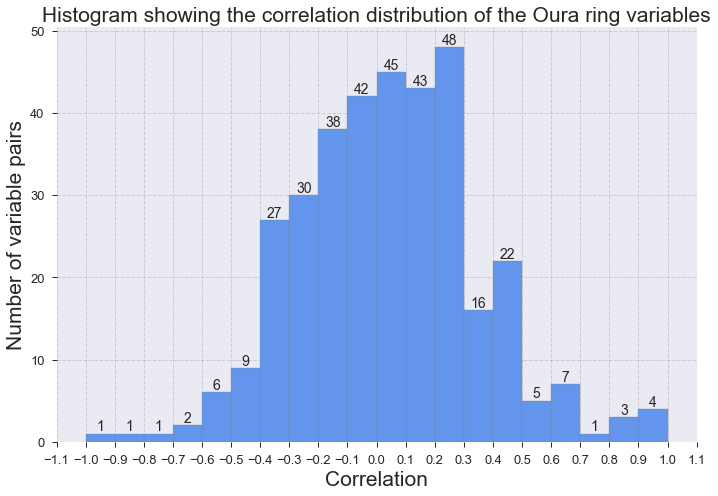

In [9]:
# Plot the correlation values of the heat map in a histogram
n_bins = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
plt.style.use("seaborn")
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.tick_params(axis='both', which='major', size=5, labelsize=13)
axs.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

# Creating the histogram
N, bins, patches = axs.hist(non_zero, color = "cornflowerblue", ec="gray", bins = n_bins)

axs.bar_label(patches, fontsize=14)
axs.set_xlabel("Correlation", fontsize=21)
axs.set_ylabel("Number of variable pairs", fontsize=21)
axs.set_title('Histogram showing the correlation distribution of the Oura ring variables', fontsize=21)
axs.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))

plt.show()

### Visualizations of the sleep scores in relation to activities (coffee and alcohol consumption, workout, stress-relieving activities)

In [10]:
# Function that returns the average of an integer list
def average(lst):
    if (len(lst)) == 0:
        return 0
    else: 
        return sum(lst) / len(lst)

In [11]:
# Returns the average sleep score on days without the activity, the average sleep score on days with the activity and the t-test result of their
# statistical difference. 
def average_scores_per_activity(column_name, score_var):
    scores_without = df[pd.isna(df[column_name])][score_var]
    scores_with = df[~(pd.isna(df[column_name]))][score_var]
    
    average_without = average(scores_without)
    average_with = average(scores_with)
    ttest_result = stats.ttest_ind(scores_without, scores_with)

    return average_without, average_with, ttest_result

/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


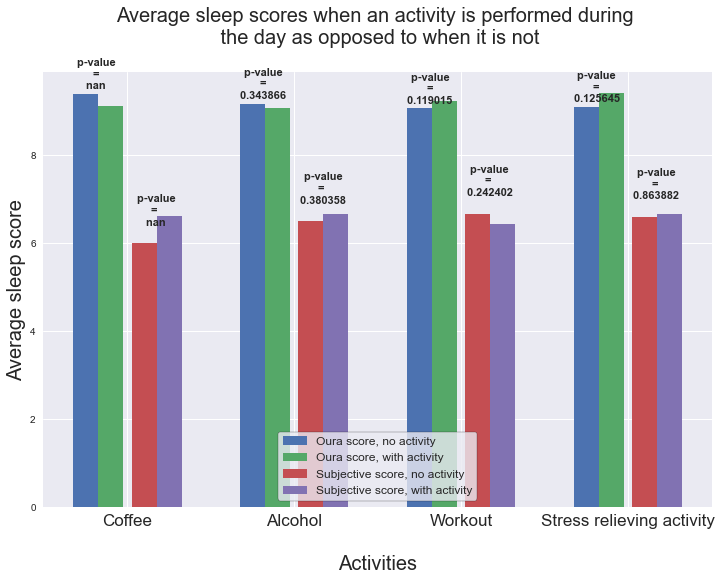

In [12]:
# Plots the average sleep scores with days when an acticity was performed as compared to those where no activity was performed
plt.style.use("seaborn")
X = ['Coffee', 'Alcohol', 'Workout', 'Stress relieving activity']

# Compute the average Oura sleep scores to be plotted
average_no_coffee, average_coffee, t_coffee = average_scores_per_activity('coffee_time', 'score')
average_no_alcohol, average_alcohol, t_alcohol = average_scores_per_activity('alcohol_time', 'score')
average_no_workout, average_workout, t_workout = average_scores_per_activity('workout_time', 'score')
average_no_stress_relief, average_stress_relief, t_stress_relief = average_scores_per_activity('stress_relief_time', 'score')

y_absent = [average_no_coffee, average_no_alcohol, average_no_workout, average_no_stress_relief]
y_present = [average_coffee, average_alcohol, average_workout, average_stress_relief]
p_values = [t_coffee[1], t_alcohol[1], t_workout[1], t_stress_relief[1]]

# Compute the average subjective sleep scores to be plotted
sub_average_no_coffee, sub_average_coffee, t_sub_coffee = average_scores_per_activity('coffee_time', 'subjective_sleep_score')
sub_average_no_alcohol, sub_average_alcohol, t_sub_alcohol = average_scores_per_activity('alcohol_time', 'subjective_sleep_score')
sub_average_no_workout, sub_average_workout, t_sub_workout = average_scores_per_activity('workout_time', 'subjective_sleep_score')
sub_average_no_stress_relief, sub_average_stress_relief, t_sub_stress_relief = average_scores_per_activity('stress_relief_time', 'subjective_sleep_score')

y_absent_sub = [sub_average_no_coffee, sub_average_no_alcohol, sub_average_no_workout, sub_average_no_stress_relief]
y_present_sub = [sub_average_coffee, sub_average_alcohol, sub_average_workout, sub_average_stress_relief]
p_sub_values = [t_sub_coffee[1], t_sub_alcohol[1], t_sub_workout[1], t_sub_stress_relief[1]]

X_axis = np.arange(len(X))

plt.figure(figsize=(12,8))
p1 = plt.bar(X_axis - 0.25, y_absent, 0.15, label = 'Oura score, no activity')
plt.bar(X_axis - 0.10, y_present, 0.15, label = 'Oura score, with activity')
p2 = plt.bar(X_axis + 0.10, y_absent_sub, 0.15, label = 'Subjective score, no activity')
plt.bar(X_axis + 0.25, y_present_sub, 0.15, label = 'Subjective score, with activity')

# Add p-values above bar plots
plt.bar_label(p1, ['       ' + 'p-value\n' + '       ' + '=\n' + '       ' + '%.6f' % p for p in p_values], padding=3, fontsize=11, fontweight="bold")
plt.bar_label(p2, ['        ' + 'p-value\n' + '       ' + '=\n' + '        ' + '%.6f' % p for p in p_sub_values], padding=16, fontsize=11, fontweight="bold")

plt.xticks(X_axis, X, fontsize=17)
plt.xlabel("\nActivities", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores when an activity is performed during \n the day as opposed to when it is not\n", fontsize=20)
plt.legend(prop={'size': 12}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

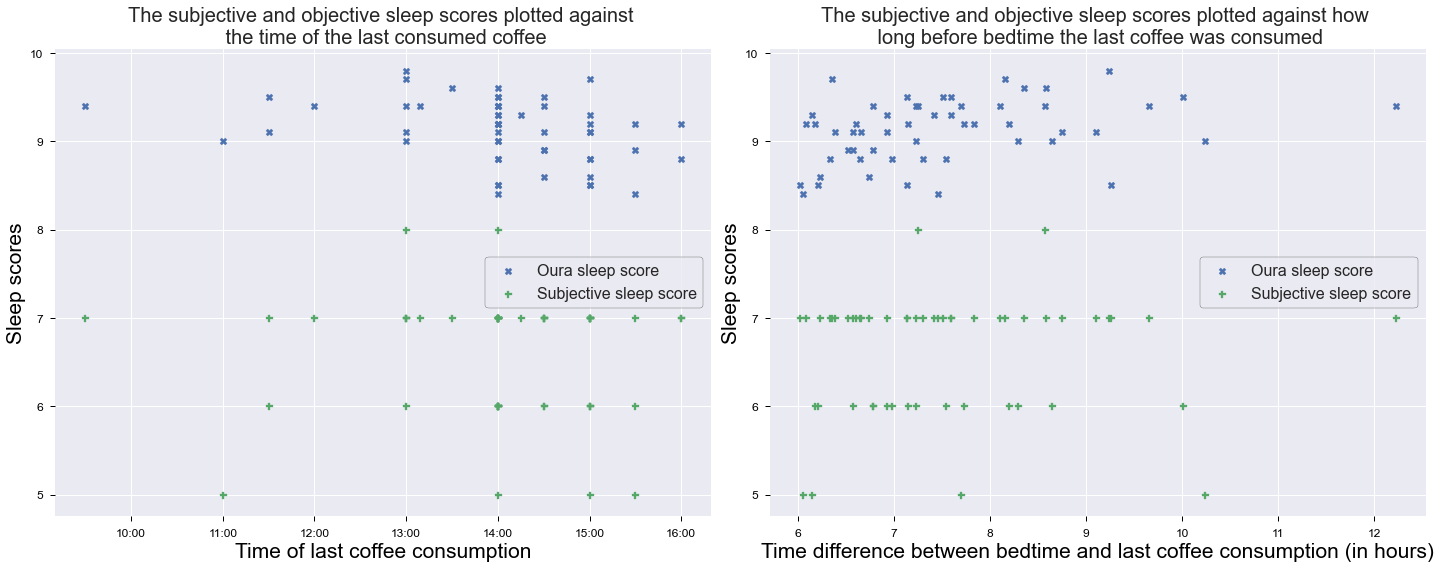

In [13]:
# Plot the sleep scores as a function of the time of the last coffee consumption
coffee_days = df[~(pd.isna(df['coffee_time']))]
coffee_days = coffee_days.reset_index()
plt.style.use("seaborn")
colour_axes = "black"

# Convert the time from float to datetime object (so that the axis shows e.g. 11:00 rather than 11.0)
cof_time = []
for index, row in coffee_days.iterrows():
    cof_time.append(datetime.datetime.fromtimestamp((coffee_days.iloc[index]['coffee_time']-1)*3600))

time_coffee = plt.figure(figsize=(20,8))
ax_coffee_time = time_coffee.add_subplot(121)
ax_coffee_time.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_coffee_time.scatter(cof_time, coffee_days['score'].values, label="Oura sleep score", marker='X')
ax_coffee_time.scatter(cof_time, coffee_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_coffee_time.set_xlabel("Time of last coffee consumption", fontsize=21)
ax_coffee_time.set_ylabel("Sleep scores", fontsize=21)
ax_coffee_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_coffee_time.set_title("The subjective and objective sleep scores plotted against \n the time of the last consumed coffee", fontsize=20)
ax_coffee_time.yaxis.label.set_color(colour_axes)
ax_coffee_time.xaxis.label.set_color(colour_axes)
ax_coffee_time.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')

# Compute how long before bed time coffee was consumed
time_before_bed = coffee_days['bed_time'].values - coffee_days['coffee_time'].values

ax_coffee_time_diff = time_coffee.add_subplot(122)
ax_coffee_time_diff.ticklabel_format(useOffset=False)
ax_coffee_time_diff.scatter(time_before_bed, coffee_days['score'].values, label="Oura sleep score", marker='X')
ax_coffee_time_diff.scatter(time_before_bed, coffee_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_coffee_time_diff.set_xlabel("Time difference between bedtime and last coffee consumption (in hours)", fontsize=21)
ax_coffee_time_diff.set_ylabel("Sleep scores", fontsize=21)
ax_coffee_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_coffee_time_diff.set_title("The subjective and objective sleep scores plotted against how \n long before bedtime the last coffee was consumed", fontsize=20)
ax_coffee_time_diff.yaxis.label.set_color(colour_axes)
ax_coffee_time_diff.xaxis.label.set_color(colour_axes)
ax_coffee_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
time_coffee.tight_layout()

plt.show()

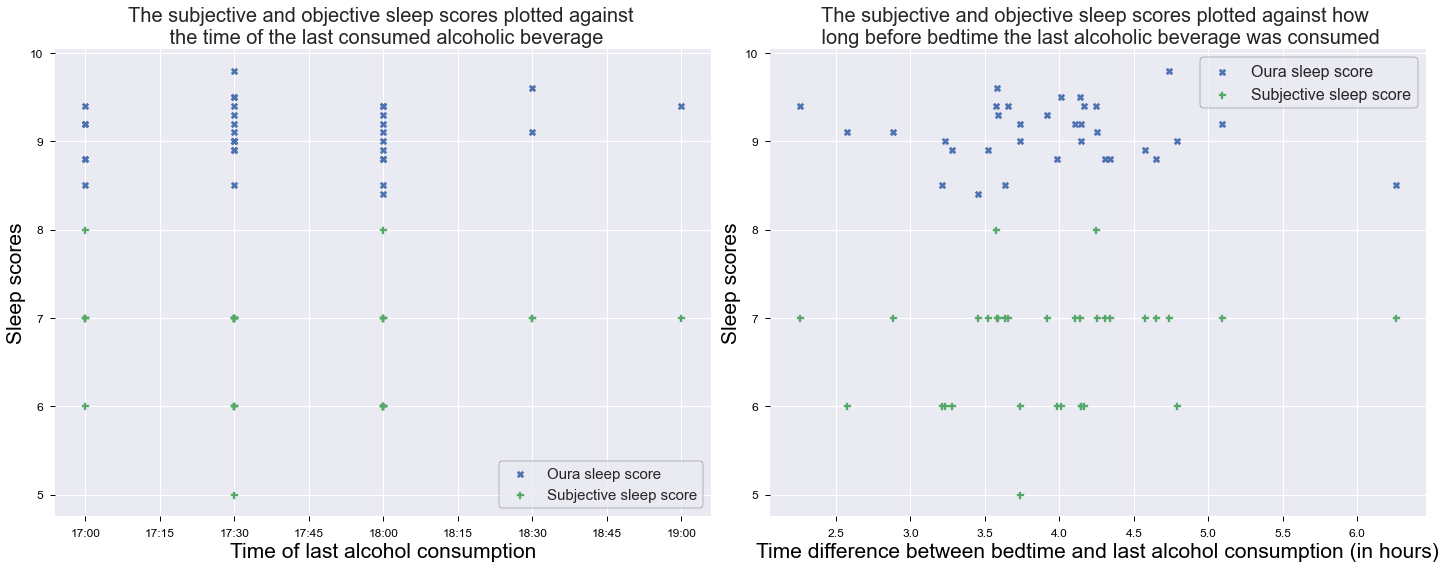

In [14]:
# Plot the sleep scores as a function of the time of the last alcohol consumption
alcohol_days = df[~(pd.isna(df['alcohol_time']))]
alcohol_days = alcohol_days.reset_index()
plt.style.use("seaborn")
colour_axes = "black"

# Convert the time from float to datetime object (so that the axis shows e.g. 11:00 rather than 11.0)
alc_time = []
for index, row in alcohol_days.iterrows():
    alc_time.append(datetime.datetime.fromtimestamp((alcohol_days.iloc[index]['alcohol_time']-1)*3600))

time_alcohol = plt.figure(figsize=(20,8))
ax_alcohol_time = time_alcohol.add_subplot(121)
ax_alcohol_time.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_alcohol_time.scatter(alc_time, alcohol_days['score'].values, label="Oura sleep score", marker='X')
ax_alcohol_time.scatter(alc_time, alcohol_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_alcohol_time.set_xlabel("Time of last alcohol consumption", fontsize=21)
ax_alcohol_time.set_ylabel("Sleep scores", fontsize=21)
ax_alcohol_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_alcohol_time.set_title("The subjective and objective sleep scores plotted against \n the time of the last consumed alcoholic beverage", fontsize=20)
ax_alcohol_time.yaxis.label.set_color(colour_axes)
ax_alcohol_time.xaxis.label.set_color(colour_axes)
ax_alcohol_time.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')

# Compute how long before bed time alcohol was consumed
time_before_bed = alcohol_days['bed_time'].values - alcohol_days['alcohol_time'].values

ax_alcohol_time_diff = time_alcohol.add_subplot(122)
ax_alcohol_time_diff.ticklabel_format(useOffset=False)
ax_alcohol_time_diff.scatter(time_before_bed, alcohol_days['score'].values, label="Oura sleep score", marker='X')
ax_alcohol_time_diff.scatter(time_before_bed, alcohol_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_alcohol_time_diff.set_xlabel("Time difference between bedtime and last alcohol consumption (in hours)", fontsize=21)
ax_alcohol_time_diff.set_ylabel("Sleep scores", fontsize=21)
ax_alcohol_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_alcohol_time_diff.set_title("The subjective and objective sleep scores plotted against how \n long before bedtime the last alcoholic beverage was consumed", fontsize=20)
ax_alcohol_time_diff.yaxis.label.set_color(colour_axes)
ax_alcohol_time_diff.xaxis.label.set_color(colour_axes)
ax_alcohol_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
time_alcohol.tight_layout()

plt.show()

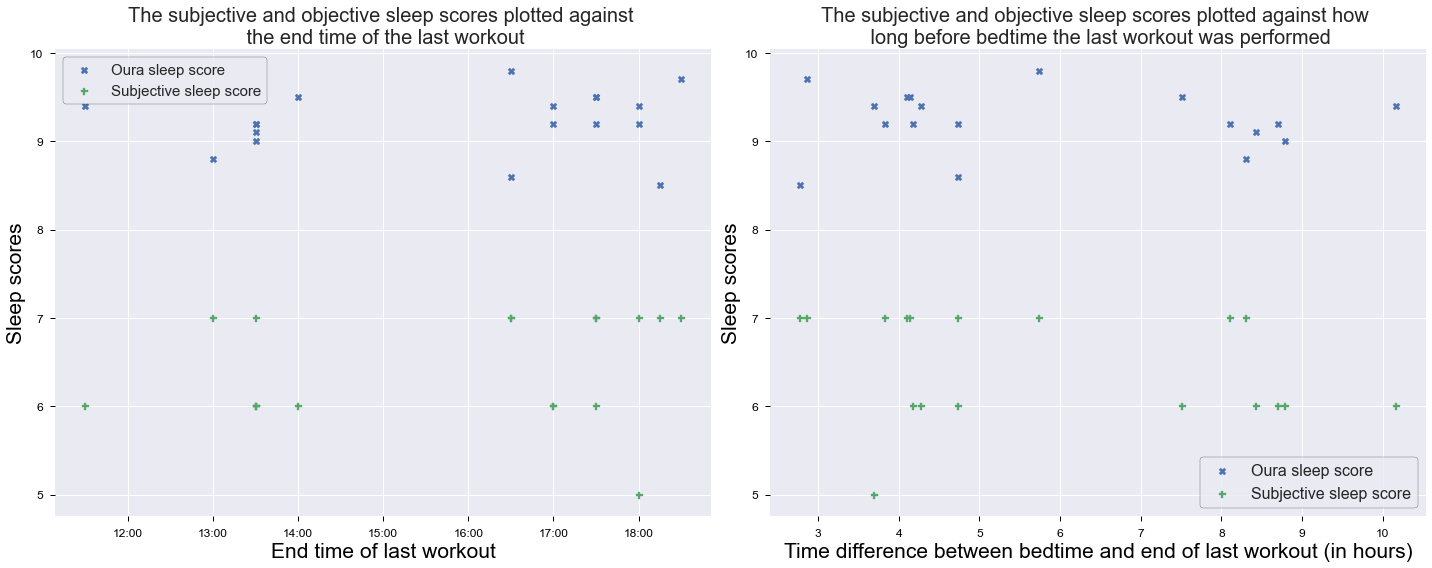

In [15]:
# Plot the sleep scores as a function of the end time of the last workout
workout_days = df[~(pd.isna(df['workout_time']))]
workout_days = workout_days.reset_index()
plt.style.use("seaborn")
colour_axes = "black"

# Convert the time from float to datetime object (so that the axis shows e.g. 11:00 rather than 11.0)
wo_time = []
for index, row in workout_days.iterrows():
    wo_time.append(datetime.datetime.fromtimestamp((workout_days.iloc[index]['workout_time']-1)*3600))

time_workout = plt.figure(figsize=(20,8))
ax_workout_time = time_workout.add_subplot(121)
ax_workout_time.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_workout_time.scatter(wo_time, workout_days['score'].values, label="Oura sleep score", marker='X')
ax_workout_time.scatter(wo_time, workout_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_workout_time.set_xlabel("End time of last workout", fontsize=21)
ax_workout_time.set_ylabel("Sleep scores", fontsize=21)
ax_workout_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_workout_time.set_title("The subjective and objective sleep scores plotted against \n the end time of the last workout", fontsize=20)
ax_workout_time.yaxis.label.set_color(colour_axes)
ax_workout_time.xaxis.label.set_color(colour_axes)
ax_workout_time.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')

# Compute how long before bed time the workout was performed
time_before_bed = workout_days['bed_time'].values - workout_days['workout_time'].values

ax_workout_time_diff = time_workout.add_subplot(122)
ax_workout_time_diff.ticklabel_format(useOffset=False)
ax_workout_time_diff.scatter(time_before_bed, workout_days['score'].values, label="Oura sleep score", marker='X')
ax_workout_time_diff.scatter(time_before_bed, workout_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_workout_time_diff.set_xlabel("Time difference between bedtime and end of last workout (in hours)", fontsize=21)
ax_workout_time_diff.set_ylabel("Sleep scores", fontsize=21)
ax_workout_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_workout_time_diff.set_title("The subjective and objective sleep scores plotted against how \n long before bedtime the last workout was performed", fontsize=20)
ax_workout_time_diff.yaxis.label.set_color(colour_axes)
ax_workout_time_diff.xaxis.label.set_color(colour_axes)
ax_workout_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
time_workout.tight_layout()

plt.show()

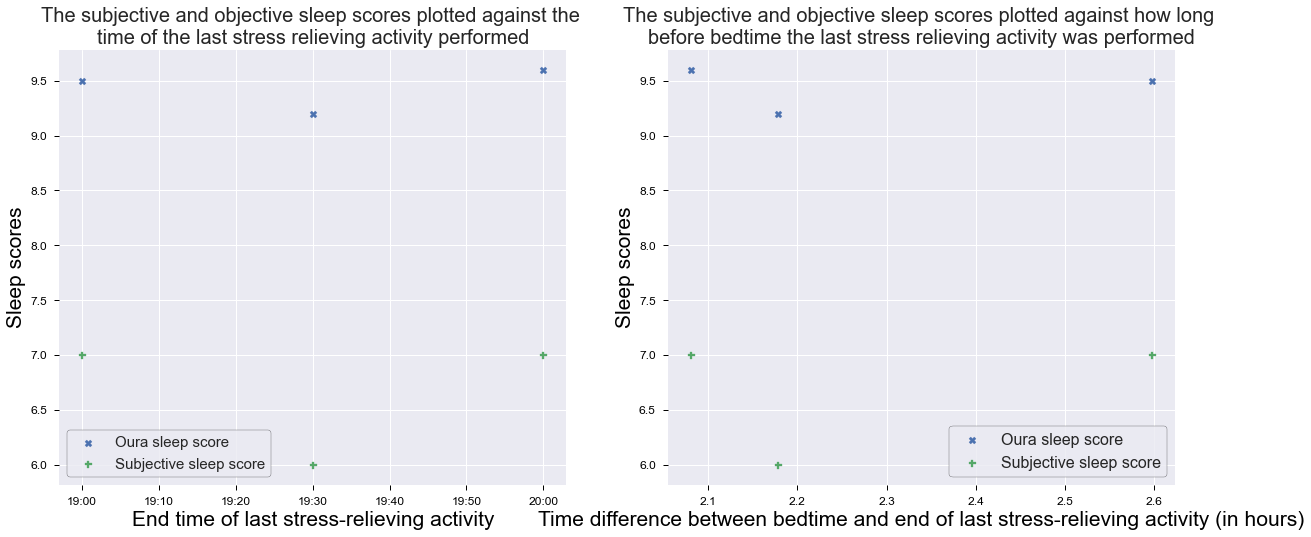

In [16]:
# Plot the sleep scores as a function of the time of the last stress-relieving activity
stress_relief_days = df[~(pd.isna(df['stress_relief_time']))]
stress_relief_days = stress_relief_days.reset_index()
plt.style.use("seaborn")
colour_axes = "black"

# Convert the time from float to datetime object (so that the axis shows e.g. 11:00 rather than 11.0)
stress_relief_time = []
for index, row in stress_relief_days.iterrows():
    stress_relief_time.append(datetime.datetime.fromtimestamp((stress_relief_days.iloc[index]['stress_relief_time']-1)*3600))

time_stress_relief = plt.figure(figsize=(20,8))
ax_stress_relief_time = time_stress_relief.add_subplot(121)
ax_stress_relief_time.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_stress_relief_time.scatter(stress_relief_time, stress_relief_days['score'].values, label="Oura sleep score", marker='X')
ax_stress_relief_time.scatter(stress_relief_time, stress_relief_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_stress_relief_time.set_xlabel("End time of last stress-relieving activity", fontsize=21)
ax_stress_relief_time.set_ylabel("Sleep scores", fontsize=21)
ax_stress_relief_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_stress_relief_time.set_title("The subjective and objective sleep scores plotted against the \ntime of the last stress relieving activity performed", fontsize=20)
ax_stress_relief_time.yaxis.label.set_color(colour_axes)
ax_stress_relief_time.xaxis.label.set_color(colour_axes)
ax_stress_relief_time.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')

# Compute how long before bed time the last stress-relieving was performed
time_before_bed = stress_relief_days['bed_time'].values - stress_relief_days['stress_relief_time'].values

ax_stress_relief_time_diff = time_stress_relief.add_subplot(122)
ax_stress_relief_time_diff.ticklabel_format(useOffset=False)
ax_stress_relief_time_diff.scatter(time_before_bed, stress_relief_days['score'].values, label="Oura sleep score", marker='X')
ax_stress_relief_time_diff.scatter(time_before_bed, stress_relief_days['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
ax_stress_relief_time_diff.set_xlabel("Time difference between bedtime and end of last stress-relieving activity (in hours)", fontsize=21)
ax_stress_relief_time_diff.set_ylabel("Sleep scores", fontsize=21)
ax_stress_relief_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
ax_stress_relief_time_diff.set_title("The subjective and objective sleep scores plotted against how long \nbefore bedtime the last stress relieving activity was performed", fontsize=20)
ax_stress_relief_time_diff.yaxis.label.set_color(colour_axes)
ax_stress_relief_time_diff.xaxis.label.set_color(colour_axes)
ax_stress_relief_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
time_alcohol.tight_layout()

plt.show()

### Type of activities performed in the last 3 hours before bedtime

In [17]:
# Returns the average sleep score on days without the activity, the average sleep score on days with the activity and the t-test result of their
# statistical difference. 
def average_scores_0_1(column_name, score_var):
    if column_name in df.columns:
        scores_without = df[df[column_name] == 0][score_var]
        scores_with = df[df[column_name] == 1][score_var]

        average_without = average(scores_without)
        average_with = average(scores_with)
        ttest_result = stats.ttest_ind(scores_without, scores_with)

        return average_without, average_with, ttest_result
    else:
        return average(df[score_var]), 0, [np.nan, np.nan]

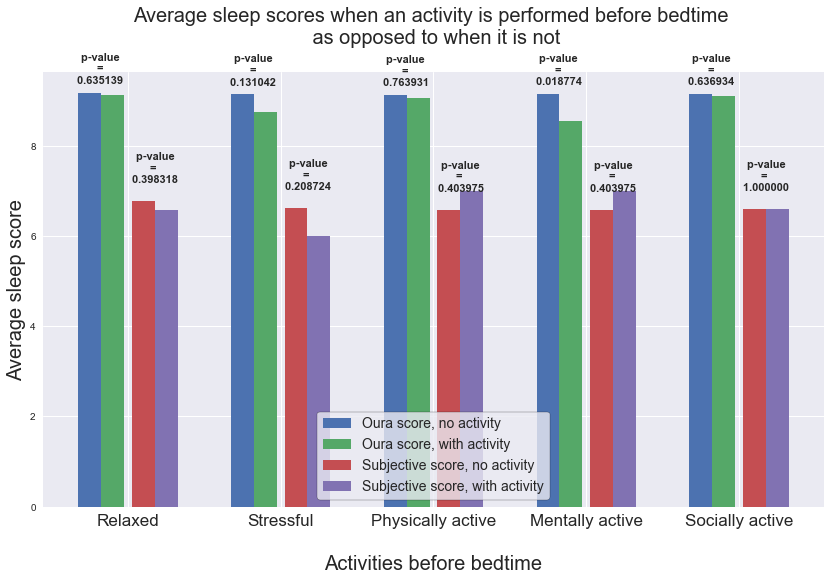

In [18]:
# Plots the average sleep scores for days with and without different activities performed before bedtime
plt.style.use("seaborn")
X = ['Relaxed', 'Stressful', 'Physically active', 'Mentally active', 'Socially active']

# Compute the average Oura sleep scores to be plotted
average_not_relaxed, average_relaxed, t_relaxed = average_scores_0_1(X[0], 'score')
average_not_stressful, average_stressful, t_stressful = average_scores_0_1(X[1], 'score')
average_not_phys, average_phys, t_phys = average_scores_0_1(X[2], 'score')
average_not_mental, average_mental, t_mental = average_scores_0_1(X[3], 'score')
average_not_social, average_social, t_social = average_scores_0_1(X[4], 'score')

y_absent = [average_not_relaxed, average_not_stressful, average_not_phys, average_not_mental, average_not_social]
y_present = [average_relaxed, average_stressful, average_phys, average_mental, average_social]
p_values = [t_relaxed[1], t_stressful[1], t_phys[1], t_mental[1], t_social[1]]

# Compute the average subjective sleep scores to be plotted
sub_average_not_relaxed, sub_average_relaxed, t_sub_relaxed = average_scores_0_1(X[0], 'subjective_sleep_score')
sub_average_not_stressful, sub_average_stressful, t_sub_stressful = average_scores_0_1(X[1], 'subjective_sleep_score')
sub_average_not_phys, sub_average_phys, t_sub_phys = average_scores_0_1(X[2], 'subjective_sleep_score')
sub_average_not_mental, sub_average_mental, t_sub_mental = average_scores_0_1(X[3], 'subjective_sleep_score')
sub_average_not_social, sub_average_social, t_sub_social = average_scores_0_1(X[4], 'subjective_sleep_score')

y_absent_sub = [sub_average_not_relaxed, sub_average_not_stressful, sub_average_not_phys, sub_average_not_mental, sub_average_not_social]
y_present_sub = [sub_average_relaxed, sub_average_stressful, sub_average_phys, sub_average_mental, sub_average_social]
p_sub_values = [t_sub_relaxed[1], t_sub_stressful[1], t_sub_phys[1], t_sub_mental[1], t_sub_social[1]]

X_axis = np.arange(len(X))

plt.figure(figsize=(14,8))
p1 = plt.bar(X_axis - 0.25, y_absent, 0.15, label = 'Oura score, no activity')
plt.bar(X_axis - 0.10, y_present, 0.15, label = 'Oura score, with activity')
p2 = plt.bar(X_axis + 0.10, y_absent_sub, 0.15, label = 'Subjective score, no activity')
plt.bar(X_axis + 0.25, y_present_sub, 0.15, label = 'Subjective score, with activity')

# Add p-values above bar plots
plt.bar_label(p1, ['       ' + 'p-value\n' + '       ' + '=\n' + '       ' + '%.6f' % p for p in p_values], padding=7, fontsize=11, fontweight="bold")
plt.bar_label(p2, ['        ' + 'p-value\n' + '       ' + '=\n' + '        ' + '%.6f' % p for p in p_sub_values], padding=16, fontsize=11, fontweight="bold")

plt.xticks(X_axis, X, fontsize=17)
plt.xlabel("\nActivities before bedtime", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores when an activity is performed before bedtime \n as opposed to when it is not\n", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

### Stress level of the individual

In [19]:
# Compute the list of average of all the different values that exist for a given variable
def get_averages(X, column_name, score_var):
    averages = []
    for i in X:
        all_sleep_scores = df[df[column_name]==i][score_var]
        averages.append(average(all_sleep_scores))

    return averages

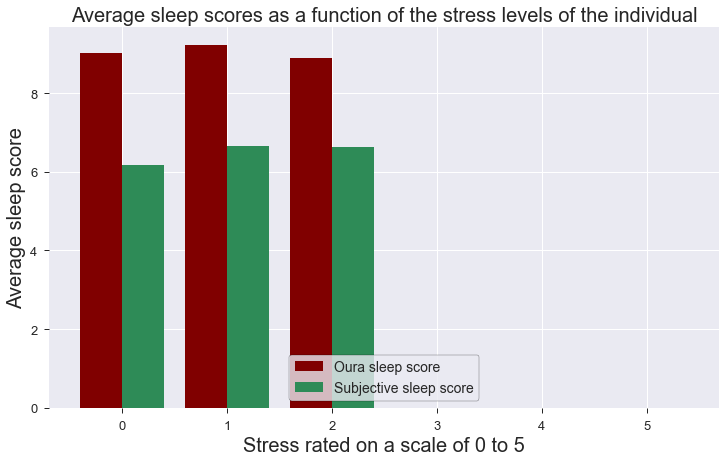

In [20]:
# Plot the average objective and subjective sleep scores as a function of the stress levels of the individual
plt.style.use("seaborn")
fig = plt.figure(figsize = (12, 7))
X = [0, 1, 2, 3, 4, 5]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, get_averages(X, 'stress_levels', 'score'), color ='maroon', width = 0.4, label = 'Oura sleep score')
plt.bar(X_axis + 0.2, get_averages(X, 'stress_levels', 'subjective_sleep_score'), color ='seagreen', width = 0.4, label = 'Subjective sleep score')

plt.tick_params(axis='both', which='major', size=5, labelsize=13)
plt.xlabel("Stress rated on a scale of 0 to 5", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores as a function of the stress levels of the individual", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

### Food consumption in the last 3 hours before bedtime

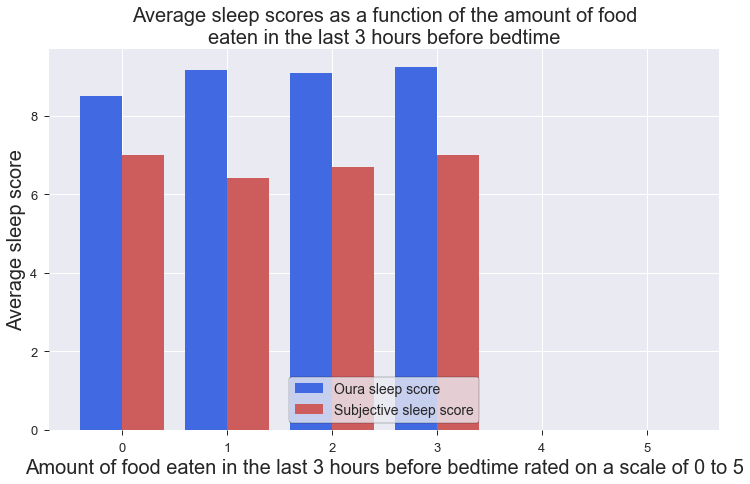

In [21]:
# Plot the average objective and subjective sleep scores as a function of how much a person ate in the last 3 hours before bedtime
plt.style.use("seaborn")
fig = plt.figure(figsize = (12, 7))
X = [0, 1, 2, 3, 4, 5]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, get_averages(X, 'eat_bedtime', 'score'), color ='royalblue', width = 0.4, label = 'Oura sleep score')
plt.bar(X_axis + 0.2, get_averages(X, 'eat_bedtime', 'subjective_sleep_score'), color ='indianred', width = 0.4, label = 'Subjective sleep score')

plt.tick_params(axis='both', which='major', size=5, labelsize=13)
plt.xlabel("Amount of food eaten in the last 3 hours before bedtime rated on a scale of 0 to 5", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores as a function of the amount of food\neaten in the last 3 hours before bedtime", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

### Wake up method

In [22]:
def get_sleep_scores_column(column_name):
    if column_name in df.columns:
        scores_oura = df[df[column_name] == 1].score
        sub_scores = df[df[column_name] == 1].subjective_sleep_score
    else: 
        scores_oura = [0]
        sub_scores = [0]
    return scores_oura, sub_scores

In [27]:
def print_anova_scores_wakup(scores, sub_scores):
    if (participant_number == 1):
        print('ANOVA of Oura sleep scores as a function of wake up methods')
        print(f_oneway(scores[0].values, scores[1].values))
        print('ANOVA of subjective sleep scores as a function of stress levels')
        print(f_oneway(sub_scores[0].values, sub_scores[1].values))
    else:
        print('ANOVA of Oura sleep scores as a function of wake up methods')
        print(f_oneway(scores[0].values, scores[1].values, scores[2].values))
        print('ANOVA of subjective sleep scores as a function of stress levels')
        print(f_oneway(sub_scores[0].values, sub_scores[1].values, sub_scores[2].values))

ANOVA of Oura sleep scores as a function of wake up methods
F_onewayResult(statistic=0.01704925543954618, pvalue=0.8966076137922914)
ANOVA of subjective sleep scores as a function of stress levels
F_onewayResult(statistic=0.7250680139914498, pvalue=0.398317640726931)


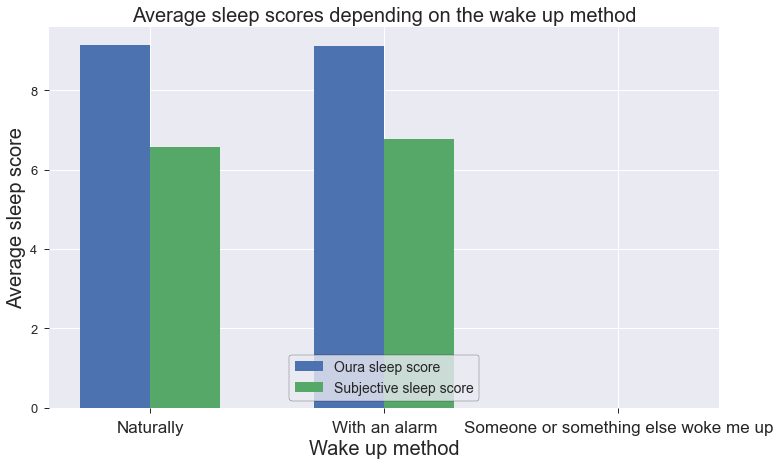

In [28]:
# Plots the average sleep scores depending on the method by which the person woke up
plt.style.use("seaborn")
X = ['Naturally', 'With an alarm', 'Someone or something else woke me up']

# Get the sleep scores to be plotted
scores_naturally, scores_sub_naturally = get_sleep_scores_column(X[0])
scores_alarm, scores_sub_alarm = get_sleep_scores_column(X[1])
scores_else, scores_sub_else = get_sleep_scores_column(X[2])

print_anova_scores_wakup([scores_naturally, scores_alarm, scores_else], [scores_sub_naturally, scores_sub_alarm, scores_sub_else])

Y = [average(scores_naturally), average(scores_alarm), average(scores_else)]

Y_sub = [average(scores_sub_naturally), average(scores_sub_alarm), average(scores_sub_else)]

X_axis = np.arange(len(X))

plt.figure(figsize=(12,7))
plt.bar(X_axis - 0.15, Y, 0.3, label = 'Oura sleep score')
plt.bar(X_axis + 0.15, Y_sub, 0.3, label = 'Subjective sleep score')

plt.tick_params(axis='both', which='major', size=5, labelsize=13)
plt.xticks(X_axis, X, fontsize=17)
plt.xlabel("Wake up method", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores depending on the wake up method", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

### Time of last blue light exposure

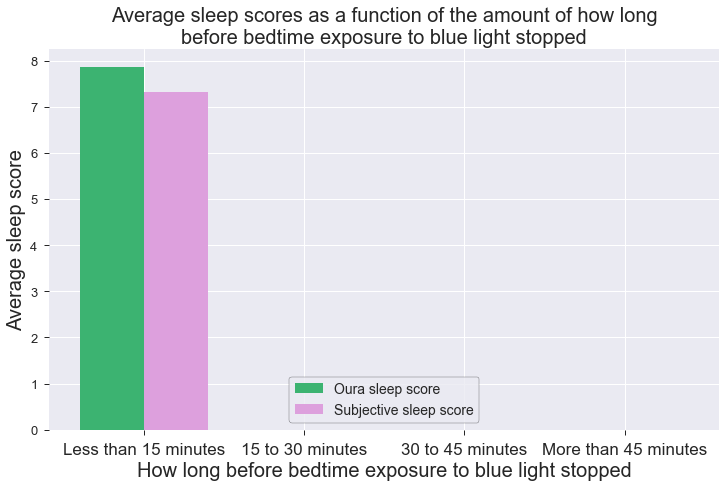

In [ ]:
# Plot the average objective and subjective sleep scores as a function of how long before bedtime exposure to blue light stopped
plt.style.use("seaborn")
fig = plt.figure(figsize = (12, 7))
X = [0, 1, 2, 3]
X_labels = ['Less than 15 minutes', '15 to 30 minutes', '30 to 45 minutes', 'More than 45 minutes']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, get_averages(X, 'blue_light', 'score'), color ='mediumseagreen', width = 0.4, label = 'Oura sleep score')
plt.bar(X_axis + 0.2, get_averages(X, 'blue_light', 'subjective_sleep_score'), color ='plum', width = 0.4, label = 'Subjective sleep score')

plt.tick_params(axis='both', which='major', size=5, labelsize=13)
plt.xticks(X_axis, X_labels, fontsize=17)
plt.xlabel("How long before bedtime exposure to blue light stopped", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores as a function of the amount of how long\nbefore bedtime exposure to blue light stopped", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

### Whether something prevented an earlier sleep

p-value of the difference in Oura sleep scores: 4.38548630026255e-09
p-value of the difference in subjective sleep scores: 0.0013974911050445146


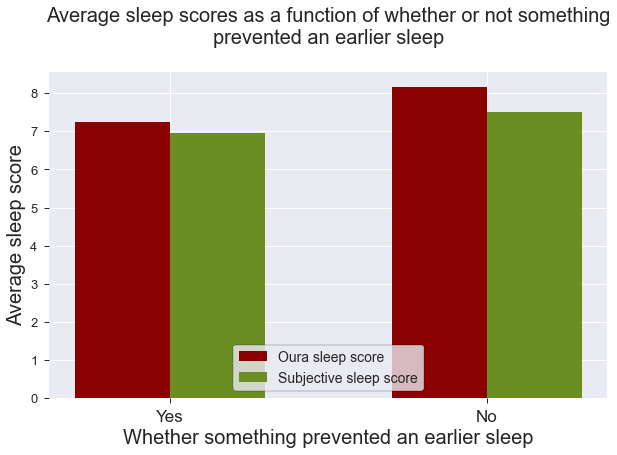

In [ ]:
# Plot the average sleep scores as a function of whether or not something prevented an earlier sleep
plt.style.use("seaborn")
X = ['Yes', 'No']

average_no_prevent_early, average_prevent_early, t_prevent_early = average_scores_0_1('prevent_early_sleep', 'score')
sub_average_no_prevent_early, sub_prevent_early, t_sub_prevent_early = average_scores_0_1('prevent_early_sleep', 'subjective_sleep_score')

y = [average_prevent_early, average_no_prevent_early]
y_sub = [sub_prevent_early, sub_average_no_prevent_early]

X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.15, y, 0.3, color = 'darkred', label = 'Oura sleep score')
plt.bar(X_axis + 0.15, y_sub, 0.3, color = 'olivedrab', label = 'Subjective sleep score')

plt.tick_params(axis='both', which='major', size=5, labelsize=13)
plt.xticks(X_axis, X, fontsize=17)
plt.xlabel("Whether something prevented an earlier sleep", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores as a function of whether or not something\nprevented an earlier sleep\n", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')

print("p-value of the difference in Oura sleep scores:", t_prevent_early[1])
print("p-value of the difference in subjective sleep scores:", t_sub_prevent_early[1])
plt.show()

### Whether something prevented a better sleep

/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/_methods.py:2

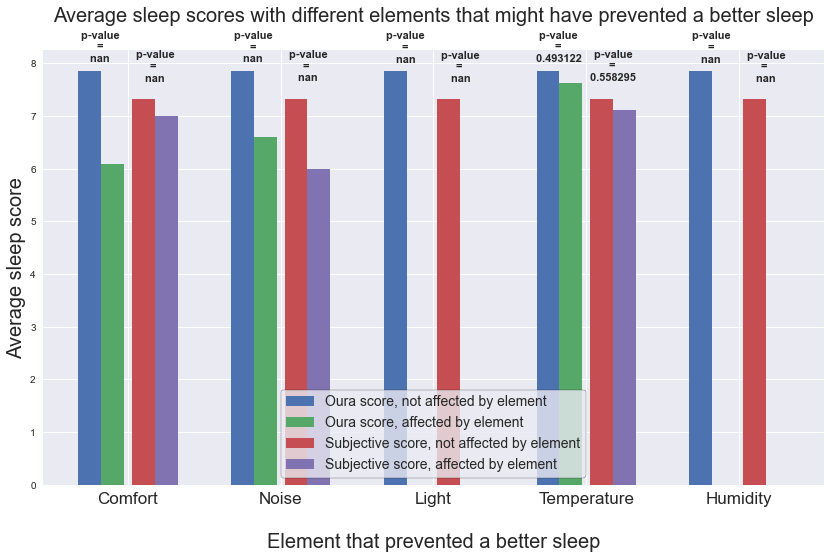

In [ ]:
# Plots the average sleep scores with different disturbances during the night
plt.style.use("seaborn")
X = ['Comfort', 'Noise', 'Light', 'Temperature', 'Humidity']

# Compute the average Oura sleep scores to be plotted
average_no_comfort, average_comfort, t_comfort = average_scores_0_1(X[0], 'score')
average_no_noise, average_noise, t_noise = average_scores_0_1(X[1], 'score')
average_no_light, average_light, t_light = average_scores_0_1(X[2], 'score')
average_no_temp, average_temp, t_temp = average_scores_0_1(X[3], 'score')
average_no_humidity, average_humidity, t_humidity = average_scores_0_1(X[4], 'score')

y_absent = [average_no_comfort, average_no_noise, average_no_light, average_no_temp, average_no_humidity]
y_present = [average_comfort, average_noise, average_light, average_temp, average_humidity]
p_values = [t_comfort[1], t_noise[1], t_light[1], t_temp[1], t_humidity[1]]

# Compute the average subjective sleep scores to be plotted
sub_average_no_comfort, sub_average_comfort, t_sub_comfort = average_scores_0_1(X[0], 'subjective_sleep_score')
sub_average_no_noise, sub_average_noise, t_sub_noise = average_scores_0_1(X[1], 'subjective_sleep_score')
sub_average_no_light, sub_average_light, t_sub_light = average_scores_0_1(X[2], 'subjective_sleep_score')
sub_average_no_temp, sub_average_temp, t_sub_temp = average_scores_0_1(X[3], 'subjective_sleep_score')
sub_average_no_humidity, sub_average_humidity, t_sub_humidity = average_scores_0_1(X[4], 'subjective_sleep_score')

y_absent_sub = [sub_average_no_comfort, sub_average_no_noise, sub_average_no_light, sub_average_no_temp, sub_average_no_humidity]
y_present_sub = [sub_average_comfort, sub_average_noise, sub_average_light, sub_average_temp, sub_average_humidity]
p_sub_values = [t_sub_comfort[1], t_sub_noise[1], t_sub_light[1], t_sub_temp[1], t_sub_humidity[1]]

X_axis = np.arange(len(X))

plt.figure(figsize=(14,8))
p1 = plt.bar(X_axis - 0.25, y_absent, 0.15, label = 'Oura score, not affected by element')
plt.bar(X_axis - 0.10, y_present, 0.15, label = 'Oura score, affected by element')
p2 = plt.bar(X_axis + 0.10, y_absent_sub, 0.15, label = 'Subjective score, not affected by element')
plt.bar(X_axis + 0.25, y_present_sub, 0.15, label = 'Subjective score, affected by element')

# Add p-values above bar plots
plt.bar_label(p1, ['       ' + 'p-value\n' + '       ' + '=\n' + '       ' + '%.6f' % p for p in p_values], padding=7, fontsize=11, fontweight="bold")
plt.bar_label(p2, ['        ' + 'p-value\n' + '       ' + '=\n' + '        ' + '%.6f' % p for p in p_sub_values], padding=16, fontsize=11, fontweight="bold")

plt.xticks(X_axis, X, fontsize=17)
plt.xlabel("\nElement that prevented a better sleep", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores with different elements that might have prevented a better sleep\n", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')
plt.show()

### Sleep scores as a function of bedtime

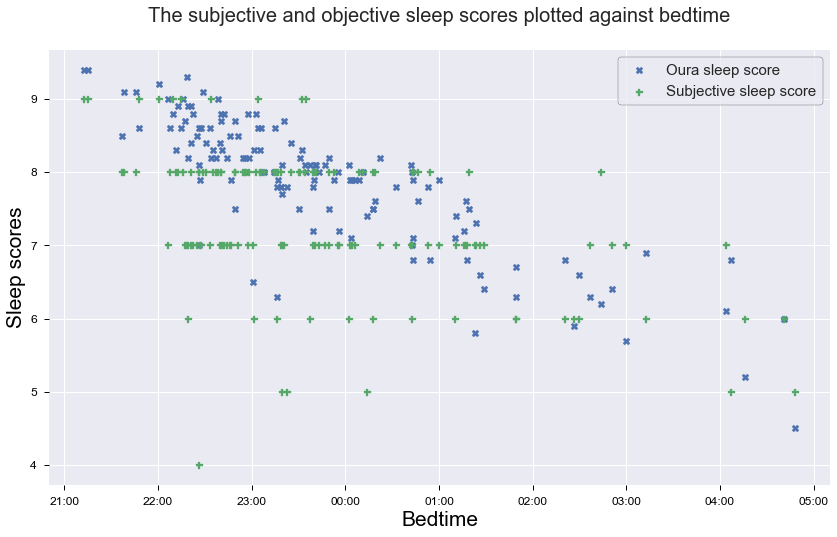

In [ ]:
# Plot the sleep scores as a function of the bedtime
plt.style.use("seaborn")
colour_axes = "black"

# Convert the time from float to datetime object (so that the axis shows e.g. 11:00 rather than 11.0)
bedtime = []
for index, row in df.iterrows():
    bedtime.append(datetime.datetime.fromtimestamp((df.iloc[index]['bed_time']-1)*3600))

bedtime_plot = plt.figure(figsize=(14,8))
bedtime_ax = bedtime_plot.add_subplot(111)
bedtime_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
bedtime_ax.scatter(bedtime, df['score'].values, label="Oura sleep score", marker='X')
bedtime_ax.scatter(bedtime, df['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
bedtime_ax.set_xlabel("Bedtime", fontsize=21)
bedtime_ax.set_ylabel("Sleep scores", fontsize=21)
bedtime_ax.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
bedtime_ax.set_title("The subjective and objective sleep scores plotted against bedtime\n", fontsize=20)
bedtime_ax.yaxis.label.set_color(colour_axes)
bedtime_ax.xaxis.label.set_color(colour_axes)
bedtime_ax.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')

### Sleep scores as a function of sleep duration

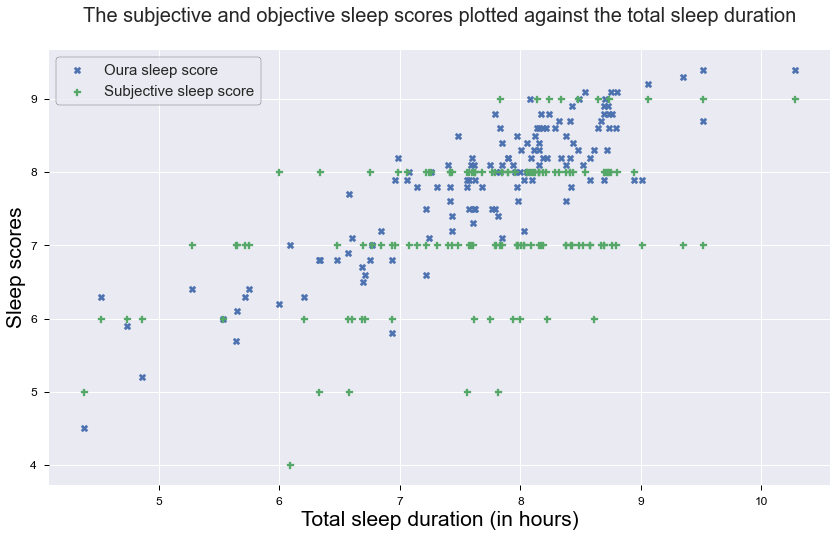

In [ ]:
# Plot the sleep scores as a function of the total sleep duration
plt.style.use("seaborn")
colour_axes = "black"

bedtime_plot = plt.figure(figsize=(14,8))
bedtime_ax = bedtime_plot.add_subplot(111)
bedtime_ax.scatter(df['total_sleep_duration'].values/3600, df['score'].values, label="Oura sleep score", marker='X')
bedtime_ax.scatter(df['total_sleep_duration'].values/3600, df['subjective_sleep_score'].values, label="Subjective sleep score", marker='P')
bedtime_ax.set_xlabel("Total sleep duration (in hours)", fontsize=21)
bedtime_ax.set_ylabel("Sleep scores", fontsize=21)
bedtime_ax.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
bedtime_ax.set_title("The subjective and objective sleep scores plotted against the total sleep duration\n", fontsize=20)
bedtime_ax.yaxis.label.set_color(colour_axes)
bedtime_ax.xaxis.label.set_color(colour_axes)
bedtime_ax.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')

### Whether medications that affect sleep were taken

p-value of the difference in Oura sleep scores: nan
p-value of the difference in subjective sleep scores: nan


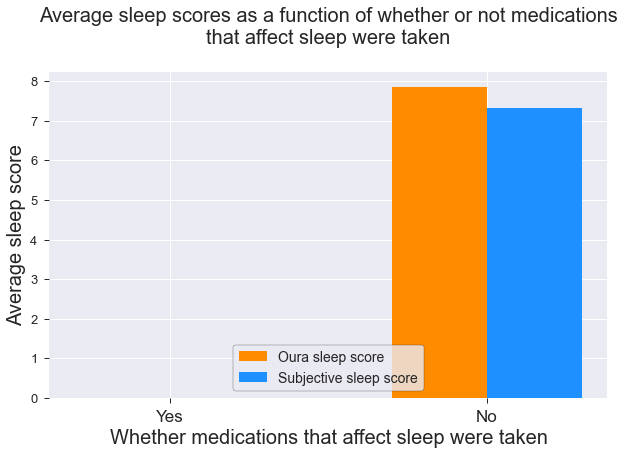

In [ ]:
# Plot the average sleep scores as a function of whether or not something prevented an earlier sleep
plt.style.use("seaborn")
X = ['Yes', 'No']

average_no_med, average_med, t_med = average_scores_0_1('medication', 'score')
sub_average_no_med, sub_med, t_sub_med = average_scores_0_1('medication', 'subjective_sleep_score')

y = [average_med, average_no_med]
y_sub = [sub_med, sub_average_no_med]

X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.15, y, 0.3, color = 'darkorange', label = 'Oura sleep score')
plt.bar(X_axis + 0.15, y_sub, 0.3, color = 'dodgerblue', label = 'Subjective sleep score')

plt.tick_params(axis='both', which='major', size=5, labelsize=13)
plt.xticks(X_axis, X, fontsize=17)
plt.xlabel("Whether medications that affect sleep were taken", fontsize=20)
plt.ylabel("Average sleep score", fontsize=20)
plt.title("Average sleep scores as a function of whether or not medications\nthat affect sleep were taken\n", fontsize=20)
plt.legend(prop={'size': 14}, frameon=True, loc="lower center").get_frame().set_edgecolor('k')

print("p-value of the difference in Oura sleep scores:", t_med[1])
print("p-value of the difference in subjective sleep scores:", t_sub_med[1])
plt.show()